# Introducing the challenge

Learn from the expert who won DrivenData's challenge

* Natural language processing
* Feature engineering
* Efficiency boosting hashing tricks

In addition to these pro-tips, we'll look at one of the ways in which we can use data to have a social impact.

School budgets in the USE are incredibly complex, and there are no standards for reporting how money is spent.

Schools want to be able to measure their performance. For example, are we spending more on textbooks than our neighboring schools, and is that investment worthwhile?

* Hundreds of hours each year are spent manually labelling

* Our goal: build a machine learning algorithm that can automate the process

* This is a classificaction problem

we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), because there are 9 broad categories that each take on many possible sub-label instances.

### Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing data

In [4]:
url = "https://s3.amazonaws.com/assets.datacamp.com/production/course_2533/datasets/TrainingSetSample.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


Some of the column names correspond to features - descriptions of the budget items - such as the `Job_Title_Description` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item **labels** you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom sup

* How many rows are there in the training data?
* How many columns are there in the training data?
* How many non-null entries are in the `Job_Title_Description` column?

## Exploring the data

In [5]:
data.shape

(1560, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

* 1560 rows
* 25 columns
* 1131 non-null entries in `Job_Title_Description`.

You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset.

You'll notice that there are two numeric columns, called `FTE` and `Total`.

* `FTE`: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.

* `Total`:  Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, our job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

In [9]:
data.describe()

,FTE,Total
count,449.000000,1.542000e+03
mean,0.493532,1.446867e+04
std,0.452844,7.916752e+04
min,-0.002369,-1.044084e+06
25%,0.004310,1.108111e+02
50%,0.440000,7.060299e+02
75%,1.000000,5.347760e+03
max,1.047222,1.367500e+06


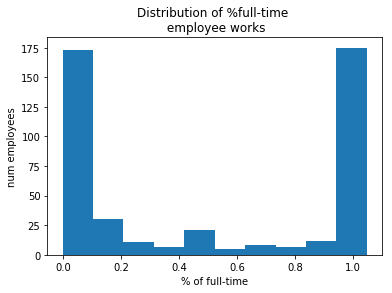

In [10]:
# plotting histogram
# Create the histogram
plt.hist(data['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the `FTE` column is bimodal. That is, there are some part-time and some full-time employees.

## Looking at the datatypes

We've seen we hace some numeric values and some text values in our dataset. It's common to have data where each value is from a known set of categories. For example, column `season_of_year` may have the values winter, spring. summer, and fall.
These kinds of data are not simply strings. Let's look at our sample dataset again.

In [13]:
data['Sharing'].head()

198            NO_LABEL
209     Shared Services
750     School Reported
931            NO_LABEL
1524           NO_LABEL
Name: Sharing, dtype: object

We can treat thse kinds of variables in a way that solves two problems for us.

The first problem is that our machine learning algorithms work on numbers. We need a numeric representation of these strings before we can do any sort of model-fitting.

The second problem is that string can be slow. We never know ahead of time how long a string is, so our computers have to take more time processing strings than numbers, which have a precise number of bits.

In pandas, 'category' dtype encodes categorical data numerically, and it can speed up our code. In pandas, we can call the `astype` function with the string category to change a column's type from object to category.

## Encode the labels as categories variables

It's always good to know what datatypes you're working with, especially when the inefficient pandas type `object` may be involved.

In [14]:
data.dtypes.value_counts()

object     23
float64     2
dtype: int64

In [27]:
# labels list
LABELS = data.dtypes[data.dtypes == object][:9]
LABELS = LABELS.index.tolist()

In [39]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
data[LABELS] = data[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(data[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


There are over 100 unique labels in this dataset. You will explore this fact by counting and plotting the number of unique values for each category of label.

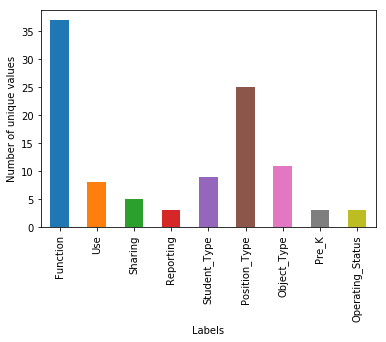

In [41]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = data[LABELS].apply(pd.Series.nunique, axis=0)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

The next step is to decide how we decide if our algorithm works. Choosing how to evaluate your machine learning model is one of the most important decisions an analyst makes.

## How do we measure success?

Often we hear the question "how accurate is your model?". Accuracy is a simple measure that tells us what percentage of rows we got right. However, sometimes accuracy doesn't tell the whole story.

> Accuracy can be misleading when classes are imbalanced.

The metric we use for this problem is called **log loss**. **Log loss** is what is generally called a *loss function*, and it's a measure of error. We want our error to be as small as possible, which is the opposite of a metric like accuracy where we want to maximize the value.

### Log loss binary classification

* Actual value: y= { 1=yes, 0=no}
* Prediction (Probability that the value is 1): p

$$
\text{log loos} = - \frac{1}{N} \cdot \Sigma_{i = 1}^{N}(y_ilog(p_i) + (1 - y_i)log(1-p_i))
$$

It takes the actual value, 1 or 0, and it takes our prediction, which is a probability between 0 and 1.


#### Example

$$
\text{logloss} _{N = 1} = ylog(p) + (1-y)log(1-p)
$$

* true label = 0
* Model confidently predicts 1 (with p = 0.90)
* $\text{Log loss} = (1 - y)log(1-p)$
                    * $=log(1 - 0.9)$
                    * $=log(0.1)$
                    * $2.3$
   
* true label = 1
* Model predicts 0 (with p = 0.50)
* Log loss = 0.69
* Better to be less confident than confident and wrong.

## Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`

In [42]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """
    Computes the logarithmic loss between predicted 
    and actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                       + (1 - actual)
                       * np.log(1 - predicted))
    return loss


In [ ]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 
